# Age Prediction using Random Forest Regression

## Part 1. Cleaning data

In [2]:
# Libraries
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, PredictionErrorDisplay
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

pd.options.mode.chained_assignment = None  # Suppress copy comments

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Load the data
data = pd.read_csv('dataset/Train.csv')

# Show the data
print("Dataset\n")
print(data.shape)
data.head()

Dataset

(3000, 26)


,Gender,Height,Weight,Blood_Pressure,Cholesterol_Level,BMI,Blood Glucose_Level,Bone_Density,Vision_Sharpness,Hearing_Ability,...,Family_History,Cognitive_Function,Mental_Health_Status,Sleep_Patterns,Stress_Levels,Pollution_Exposure,Sun_Exposure,Education_Level,Income_Level,Age
0,Male,171.148359,86.185197,151/109,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,...,NaN,44.059172,Good,Insomnia,2.797064,5.142344,7.108975,NaN,Medium,89
1,Male,172.946206,79.641937,134/112,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,...,Heart Disease,45.312298,Good,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium,77
2,Female,155.945488,49.167058,160/101,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,...,Hypertension,56.246991,Poor,Insomnia,9.234637,8.500386,5.393408,NaN,Medium,70
3,Female,169.078298,56.017921,133/94,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,...,Hypertension,55.196092,Poor,Insomnia,4.693446,7.555511,2.745578,NaN,Low,52
4,Female,163.758355,73.966304,170/106,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,...,NaN,53.023379,Good,Normal,4.038537,9.429097,3.878435,Undergraduate,High,79


In [5]:
data.dtypes

Gender                      object
Height                     float64
Weight                     float64
Blood_Pressure              object
Cholesterol_Level          float64
BMI                        float64
Blood Glucose_Level        float64
Bone_Density               float64
Vision_Sharpness           float64
Hearing_Ability            float64
Physical_Activity_Level     object
Smoking_Status              object
Alcohol_Consumption         object
Diet                        object
Chronic_Diseases            object
Medication_Use              object
Family_History              object
Cognitive_Function         float64
Mental_Health_Status        object
Sleep_Patterns              object
Stress_Levels              float64
Pollution_Exposure         float64
Sun_Exposure               float64
Education_Level             object
Income_Level                object
Age                          int64
dtype: object

In [6]:
data.isnull().sum()

Gender                        0
Height                        0
Weight                        0
Blood_Pressure                0
Cholesterol_Level             0
BMI                           0
Blood Glucose_Level           0
Bone_Density                  0
Vision_Sharpness              0
Hearing_Ability               0
Physical_Activity_Level       0
Smoking_Status                0
Alcohol_Consumption        1201
Diet                          0
Chronic_Diseases           1299
Medication_Use             1198
Family_History             1451
Cognitive_Function            0
Mental_Health_Status          0
Sleep_Patterns                0
Stress_Levels                 0
Pollution_Exposure            0
Sun_Exposure                  0
Education_Level             627
Income_Level                  0
Age                           0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
# Clean dataset
cleanData = data.copy()

In [9]:
# Divide blood pressure values
cleanData[['Systolic_BP', 'Diastolic_BP']] = cleanData['Blood_Pressure'].str.split('/', expand=True)
cleanData['Systolic_BP'] = pd.to_numeric(cleanData['Systolic_BP'])
cleanData['Diastolic_BP'] = pd.to_numeric(cleanData['Diastolic_BP'])
cleanData.drop(columns='Blood_Pressure', inplace=True)
cleanData.head()

,Gender,Height,Weight,Cholesterol_Level,BMI,Blood Glucose_Level,Bone_Density,Vision_Sharpness,Hearing_Ability,Physical_Activity_Level,...,Mental_Health_Status,Sleep_Patterns,Stress_Levels,Pollution_Exposure,Sun_Exposure,Education_Level,Income_Level,Age,Systolic_BP,Diastolic_BP
0,Male,171.148359,86.185197,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,Moderate,...,Good,Insomnia,2.797064,5.142344,7.108975,NaN,Medium,89,151,109
1,Male,172.946206,79.641937,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,Low,...,Good,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium,77,134,112
2,Female,155.945488,49.167058,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,Moderate,...,Poor,Insomnia,9.234637,8.500386,5.393408,NaN,Medium,70,160,101
3,Female,169.078298,56.017921,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,Moderate,...,Poor,Insomnia,4.693446,7.555511,2.745578,NaN,Low,52,133,94
4,Female,163.758355,73.966304,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,Low,...,Good,Normal,4.038537,9.429097,3.878435,Undergraduate,High,79,170,106


In [10]:
# Fix none values
none_feats = ['Alcohol_Consumption', 'Chronic_Diseases', 'Medication_Use', 'Family_History', 'Education_Level']

for feat in none_feats:
  cleanData[feat].fillna('None', inplace=True)

cleanData.isnull().sum()

/tmp/ipykernel_6352/214567429.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleanData[feat].fillna('None', inplace=True)


Gender                     0
Height                     0
Weight                     0
Cholesterol_Level          0
BMI                        0
Blood Glucose_Level        0
Bone_Density               0
Vision_Sharpness           0
Hearing_Ability            0
Physical_Activity_Level    0
Smoking_Status             0
Alcohol_Consumption        0
Diet                       0
Chronic_Diseases           0
Medication_Use             0
Family_History             0
Cognitive_Function         0
Mental_Health_Status       0
Sleep_Patterns             0
Stress_Levels              0
Pollution_Exposure         0
Sun_Exposure               0
Education_Level            0
Income_Level               0
Age                        0
Systolic_BP                0
Diastolic_BP               0
dtype: int64

In [11]:
# Encode categorical values
label_encoder = LabelEncoder()
hot_encoder = OneHotEncoder()

ordinal_features = ['Gender',
                    'Physical_Activity_Level',
                    'Smoking_Status',
                    'Alcohol_Consumption',
                    'Medication_Use',
                    'Education_Level',
                    'Income_Level']

nominal_features = ['Diet',
                    'Chronic_Diseases',
                    'Family_History',
                    'Mental_Health_Status',
                    'Sleep_Patterns']

for feature in ordinal_features:
    cleanData[feature] = label_encoder.fit_transform(cleanData[feature])


for feature in nominal_features:
  cleanData[feature] = label_encoder.fit_transform(cleanData[feature])
  #cleanData[feature] = hot_encoder.fit_transform(cleanData[feature])

#temp = hot_encoder.transform(cleanData['Physical_Activity_Level'])

cleanData.head()

,Gender,Height,Weight,Cholesterol_Level,BMI,Blood Glucose_Level,Bone_Density,Vision_Sharpness,Hearing_Ability,Physical_Activity_Level,...,Mental_Health_Status,Sleep_Patterns,Stress_Levels,Pollution_Exposure,Sun_Exposure,Education_Level,Income_Level,Age,Systolic_BP,Diastolic_BP
0,1,171.148359,86.185197,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,2,...,2,1,2.797064,5.142344,7.108975,1,2,89,151,109
1,1,172.946206,79.641937,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,1,...,2,2,9.339930,7.272720,3.918489,3,2,77,134,112
2,0,155.945488,49.167058,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,2,...,3,1,9.234637,8.500386,5.393408,1,2,70,160,101
3,0,169.078298,56.017921,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,2,...,3,1,4.693446,7.555511,2.745578,1,1,52,133,94
4,0,163.758355,73.966304,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,1,...,2,2,4.038537,9.429097,3.878435,3,0,79,170,106


## Part 2. Training

---




In [12]:
# Divide into features and target, then train and test
X = cleanData.drop(columns='Age')
y = cleanData['Age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

X_train.head()

,Gender,Height,Weight,Cholesterol_Level,BMI,Blood Glucose_Level,Bone_Density,Vision_Sharpness,Hearing_Ability,Physical_Activity_Level,...,Cognitive_Function,Mental_Health_Status,Sleep_Patterns,Stress_Levels,Pollution_Exposure,Sun_Exposure,Education_Level,Income_Level,Systolic_BP,Diastolic_BP
800,1,176.094441,83.065980,242.208019,26.787483,103.522079,1.160285,0.624027,31.155574,1,...,74.521603,1,2,2.173143,3.205100,2.324862,3,2,145,93
1888,1,168.072047,80.558545,239.301335,28.518103,130.692739,0.858984,0.359767,55.302593,2,...,74.472456,1,2,6.434643,7.833994,0.004750,2,0,155,121
2428,0,153.960659,66.712080,238.531562,28.143944,143.414266,0.497342,0.200000,51.639440,2,...,52.138623,2,2,8.367374,0.025757,5.451497,0,2,178,105
2105,0,159.213086,88.873458,271.698782,35.060214,154.416000,0.526393,0.211175,41.489953,2,...,57.437966,1,2,3.949816,7.661520,5.727239,1,0,149,113
2112,0,161.033550,73.067337,202.788343,28.176727,129.610323,1.071146,0.627183,30.190486,2,...,65.905023,1,2,7.213144,8.085591,11.880539,0,2,129,84


In [13]:
# Scale the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train

array([[ 1.00836835,  0.81120362,  0.80639443, ...,  1.07647696,
        -0.04811554, -0.27587479],
       [ 1.00836835, -0.05104904,  0.61430167, ..., -1.34824824,
         0.58359834,  2.57317787],
       [-0.9917011 , -1.56775106, -0.44646565, ...,  1.07647696,
         2.03654025,  0.94514778],
       ...,
       [-0.9917011 , -0.92204947, -0.38667836, ..., -1.34824824,
        -0.49031525, -0.17412291],
       [-0.9917011 , -1.54905025,  0.16930147, ..., -0.13588564,
        -1.2483719 , -0.68288231],
       [-0.9917011 , -0.45730831, -1.21685679, ...,  1.07647696,
         0.01505585, -0.37762667]])

In [40]:
# Train model
randForest = RandomForestRegressor(n_estimators=100, criterion='squared_error', min_samples_split=2, random_state=3)

randForest.fit(X_train, y_train).get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 3,
 'verbose': 0,
 'warm_start': False}

In [15]:
# Predict and evaluate training set
y_pred_train1 = randForest.predict(X_train)
mse = mean_squared_error(y_train, y_pred_train1)
print(f'Training MSE: {mse}')
rmse = np.sqrt(mse)
print(f'Training RMSE: {rmse:.2f}')
acc = 100 - mean_absolute_percentage_error(y_train, y_pred_train1)
print(f'Training Accuracy: {acc:.2f}%')

Training MSE: 4.1361377500000005
Training RMSE: 2.03
Training Accuracy: 99.96%


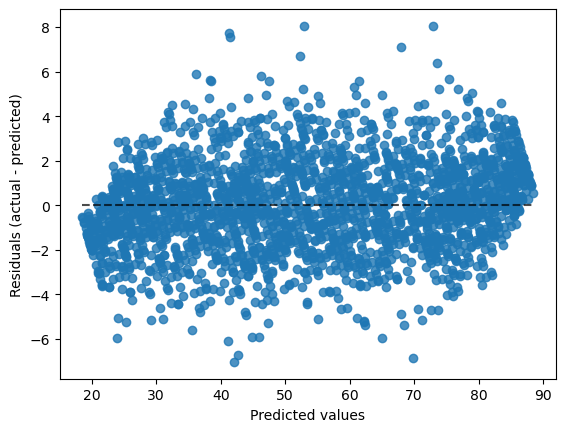

In [16]:
display = PredictionErrorDisplay(y_true=y_train, y_pred=y_pred_train1)
display.plot()
plt.show()

## Part 3. Testing

---



In [17]:
# Predict and evaluate testing set
y_pred_test1 = randForest.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test1)
print(f'Test regular MSE: {mse}')
rmse = np.sqrt(mse)
print(f'Test regular RMSE: {rmse:.2f}')
acc = 100 - mean_absolute_percentage_error(y_test, y_pred_test1)
print(f'Training Accuracy: {acc:.2f}%')

Test regular MSE: 29.177131999999997
Test regular RMSE: 5.40
Training Accuracy: 99.90%


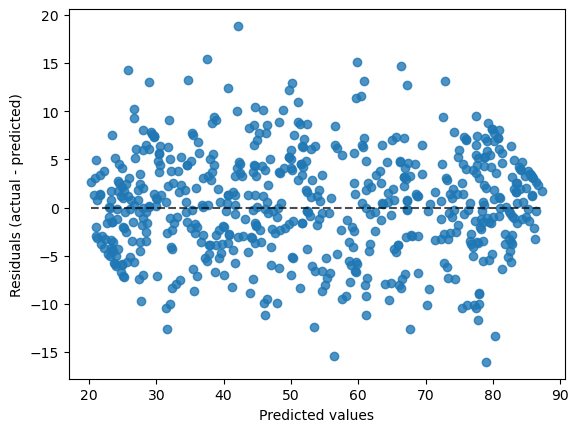

In [18]:
# Display error
display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred_test1)
display.plot()
plt.show()

In [20]:
# Test cases
i = 74
print(f'Prediction: {y_pred_test1[i]:.0f}, Real value: {y_test.iloc[i]}')

Prediction: 60, Real value: 72


## 4. Validating

---



In [21]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': ['log2', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [22]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=3, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.9s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   1.1s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.4s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.6s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, m

{'n_estimators': 80,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

In [23]:
best_random = rf_random.best_estimator_
best_random.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 30,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 80,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [24]:
# Predict and evaluate training set
y_pred_train2 = best_random.predict(X_train)
mse = mean_squared_error(y_train, y_pred_train2)
print(f'Test regular MSE: {mse}')
rmse = np.sqrt(mse)
print(f'Test regular RMSE: {rmse:.2f}')
acc = 100 - mean_absolute_percentage_error(y_train, y_pred_train2)
print(f'Training Accuracy: {acc:.2f}%')

Test regular MSE: 1.0545933884910301
Test regular RMSE: 1.03
Training Accuracy: 99.98%


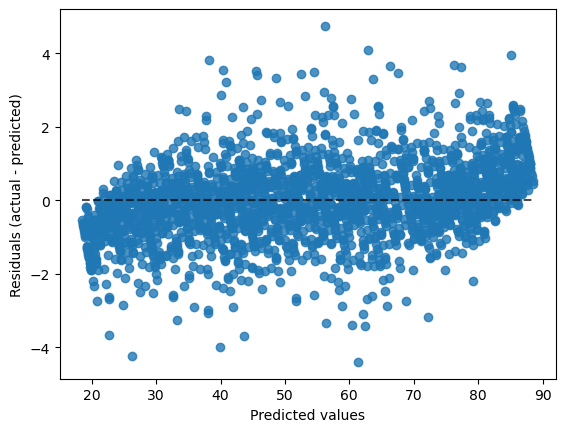

In [25]:
display = PredictionErrorDisplay(y_true=y_train, y_pred=y_pred_train2)
display.plot()
plt.show()

## 5. Testing

---



In [26]:
# Predict and evaluate
y_pred_test2 = best_random.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test2)
print(f'Test regular MSE: {mse}')
rmse = np.sqrt(mse)
print(f'Test regular RMSE: {rmse:.2f}')
acc = 100 - mean_absolute_percentage_error(y_test, y_pred_test2)
print(f'Training Accuracy: {acc:.2f}%')

Test regular MSE: 29.014939700593178
Test regular RMSE: 5.39
Training Accuracy: 99.90%


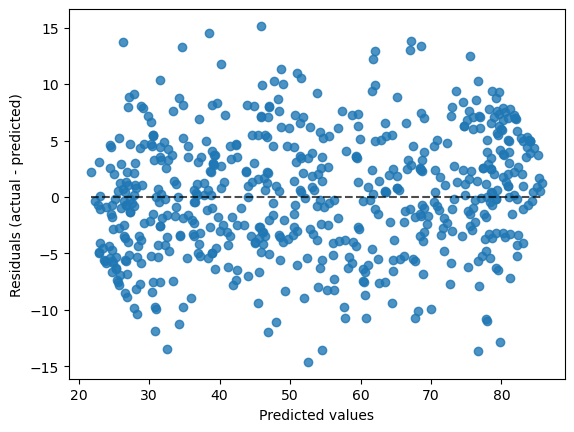

In [27]:
display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred_test2)
display.plot()
plt.show()

In [29]:
# Test cases
i = 74
print(f'Prediction: {y_pred_test2[i]:.0f}, Real value: {y_test.iloc[i]}')

Prediction: 62, Real value: 72


## 6. Validating

---



In [30]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 80, stop = 100, num = 5)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(0, 20, num = 5)]
max_depth.append(None)
# Maximum number of levels in tree
max_features = [1, 2, 3]
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': [5],
               'min_samples_leaf': [2],
               'bootstrap': [False]}
print(param_grid)

{'n_estimators': [80, 85, 90, 95, 100], 'max_features': [1, 2, 3], 'max_depth': [0, 5, 10, 15, 20, None], 'min_samples_split': [5], 'min_samples_leaf': [2], 'bootstrap': [False]}


In [33]:
# Use grid search to find best hyperparameters
rf = RandomForestRegressor()
# Grid search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='neg_mean_absolute_error', cv = 3, n_jobs = -1, verbose = 2)
# Fit the grid search model
grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 3 folds for each of 90 candidates, totalling 270 fits
[CV] END bootstrap=False, max_depth=0, max_features=1, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   0.0s
[CV] END bootstrap=False, max_depth=0, max_features=1, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   0.0s
[CV] END bootstrap=False, max_depth=0, max_features=1, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   0.0s
[CV] END bootstrap=False, max_depth=0, max_features=1, min_samples_leaf=2, min_samples_split=5, n_estimators=85; total time=   0.0s
[CV] END bootstrap=False, max_depth=0, max_features=1, min_samples_leaf=2, min_samples_split=5, n_estimators=85; total time=   0.0s
[CV] END bootstrap=False, max_depth=0, max_features=1, min_samples_leaf=2, min_samples_split=5, n_estimators=85; total time=   0.0s
[CV] END bootstrap=False, max_depth=0, max_features=1, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   0.0s
[CV] END boots

/home/fsp/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
45 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/home/fsp/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/fsp/.local/lib/python3.10/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/fsp/.local/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/home/fsp/.local/lib/python3.1

{'bootstrap': False,
 'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 80}

In [34]:
best_grid = grid_search.best_estimator_
best_grid.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 3,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 80,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [35]:
# Predict and evaluate training set
y_pred_train3 = best_grid.predict(X_train)
mse = mean_squared_error(y_train, y_pred_train3)
print(f'Test regular MSE: {mse}')
rmse = np.sqrt(mse)
print(f'Test regular RMSE: {rmse:.2f}')
acc = 100 - mean_absolute_percentage_error(y_train, y_pred_train3)
print(f'Training Accuracy: {acc:.2f}%')

Test regular MSE: 2.1138383320734464
Test regular RMSE: 1.45
Training Accuracy: 99.97%


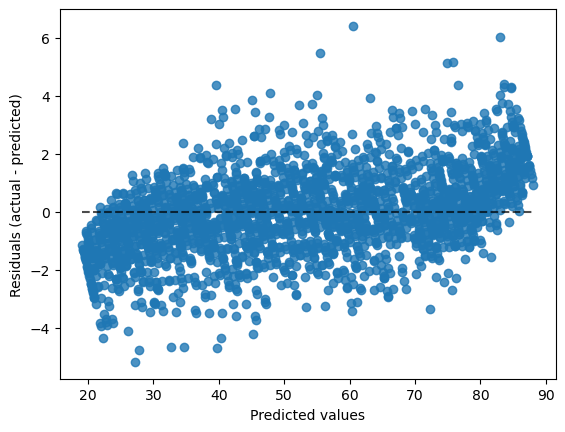

In [36]:
display = PredictionErrorDisplay(y_true=y_train, y_pred=y_pred_train3)
display.plot()
plt.show()

## 7. Testing

---



In [37]:
# Predict and evaluate
y_pred_test3 = best_grid.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test3)
print(f'Test regular MSE: {mse}')
rmse = np.sqrt(mse)
print(f'Test regular RMSE: {rmse:.2f}')
acc = 100 - mean_absolute_percentage_error(y_test, y_pred_test3)
print(f'Training Accuracy: {acc:.2f}%')

Test regular MSE: 34.856482517847375
Test regular RMSE: 5.90
Training Accuracy: 99.89%


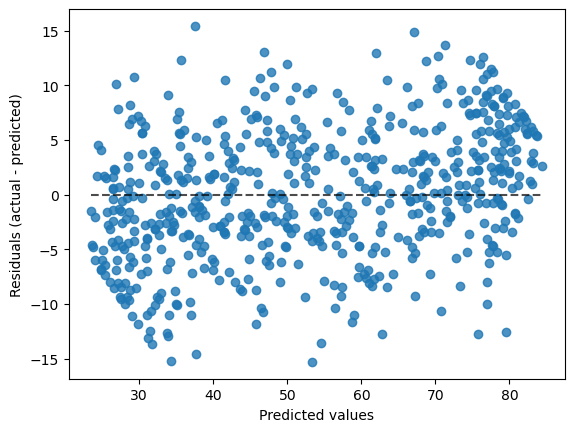

In [38]:
display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred_test3)
display.plot()
plt.show()

In [39]:
# Test cases
i = 74
print(f'Prediction: {y_pred_test3[i]:.0f}, Real value: {y_test.iloc[i]}')

Prediction: 65, Real value: 72
